<a href="https://colab.research.google.com/github/MoeApps/AcademIQ/blob/main/Pass_Fail_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [258]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

import matplotlib.pyplot as plt


In [259]:
df = pd.read_csv("phase2_risk_clusters.csv")
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              175 non-null    object 
 1   total_time_spent        175 non-null    float64
 2   total_events            175 non-null    float64
 3   avg_time_per_event      175 non-null    float64
 4   active_days             175 non-null    int64  
 5   access_frequency        175 non-null    float64
 6   avg_quiz_score          175 non-null    float64
 7   quiz_attempt_count      175 non-null    int64  
 8   quiz_score_std          175 non-null    float64
 9   avg_quiz_time           175 non-null    float64
 10  avg_assignment_score    175 non-null    float64
 11  late_submission_ratio   175 non-null    float64
 12  assignment_count        175 non-null    int64  
 13  avg_final_grade         175 non-null    float64
 14  failed_courses          175 non-null    in

In [260]:
df['failed_courses'].value_counts()

,count
failed_courses,
1,71
0,56
2,36
3,11
4,1


Define pass/fail label

In [261]:
df['pass_fail'] = (df['failed_courses'] <= 0).astype(int)
df['pass_fail'].value_counts(normalize=True)
df['pass_fail'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              175 non-null    object 
 1   total_time_spent        175 non-null    float64
 2   total_events            175 non-null    float64
 3   avg_time_per_event      175 non-null    float64
 4   active_days             175 non-null    int64  
 5   access_frequency        175 non-null    float64
 6   avg_quiz_score          175 non-null    float64
 7   quiz_attempt_count      175 non-null    int64  
 8   quiz_score_std          175 non-null    float64
 9   avg_quiz_time           175 non-null    float64
 10  avg_assignment_score    175 non-null    float64
 11  late_submission_ratio   175 non-null    float64
 12  assignment_count        175 non-null    int64  
 13  avg_final_grade         175 non-null    float64
 14  failed_courses          175 non-null    in

In [262]:
risk_mapping = {
    'Low Risk': 0,
    'Medium Risk': 1,
    'High Risk': 2
}

df['risk_cluster_encoded'] = df['risk_cluster'].map({
    'Low Risk': 0,
    'Medium Risk': 1,
    'High Risk': 2
})
df['risk_cluster_encoded'] = df['risk_cluster_encoded'].fillna(1)
df[['risk_cluster', 'risk_cluster_encoded']].head()


,risk_cluster,risk_cluster_encoded
0,0,1.0
1,0,1.0
2,0,1.0
3,0,1.0
4,0,1.0


In [263]:
features = [
 'total_time_spent',
 'active_days',
 'access_frequency',
 'avg_quiz_score',
 'quiz_score_std',
 'avg_assignment_score',
 'late_submission_ratio',
 'risk_cluster',
 'risk_cluster_encoded',
 'avg_final_grade'
]


Missing sets

In [264]:
missing = set(features) - set(df.columns)
missing


set()

In [265]:
X = df[features]
y = df['pass_fail']

X.shape, y.shape



((175, 10), (175,))

Train/Test split

In [266]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


,proportion
pass_fail,
0,0.685714
1,0.314286


Log Reg

In [267]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [268]:
y_pred_lr = log_reg.predict(X_test)


In [269]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.6571428571428571
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        24
           1       0.45      0.45      0.45        11

    accuracy                           0.66        35
   macro avg       0.60      0.60      0.60        35
weighted avg       0.66      0.66      0.66        35



#Random Forest

In [271]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Random Forest Accuracy: 0.6285714285714286


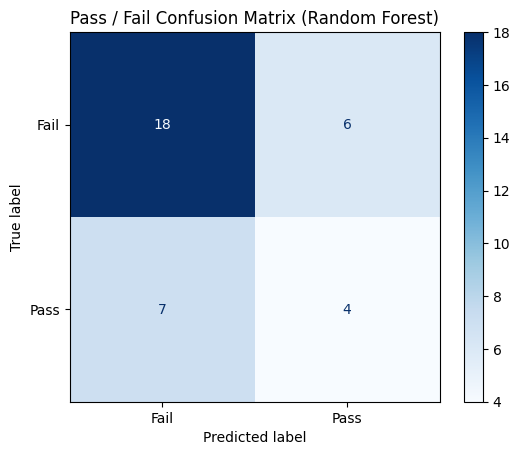

              precision    recall  f1-score   support

           0       0.72      0.75      0.73        24
           1       0.40      0.36      0.38        11

    accuracy                           0.63        35
   macro avg       0.56      0.56      0.56        35
weighted avg       0.62      0.63      0.62        35



In [272]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Fail', 'Pass']
)

disp.plot(cmap='Blues')
plt.title("Pass / Fail Confusion Matrix (Random Forest)")
plt.show()
print(classification_report(y_test, y_pred_rf))


In [273]:
importances = rf.feature_importances_

feature_importance = pd.Series(
    importances,
    index=features
).sort_values(ascending=False)

feature_importance


,0
avg_final_grade,0.381872
avg_quiz_score,0.103969
avg_assignment_score,0.103789
total_time_spent,0.089409
access_frequency,0.085665
quiz_score_std,0.079873
active_days,0.062921
late_submission_ratio,0.053415
risk_cluster,0.039087
risk_cluster_encoded,0.000000


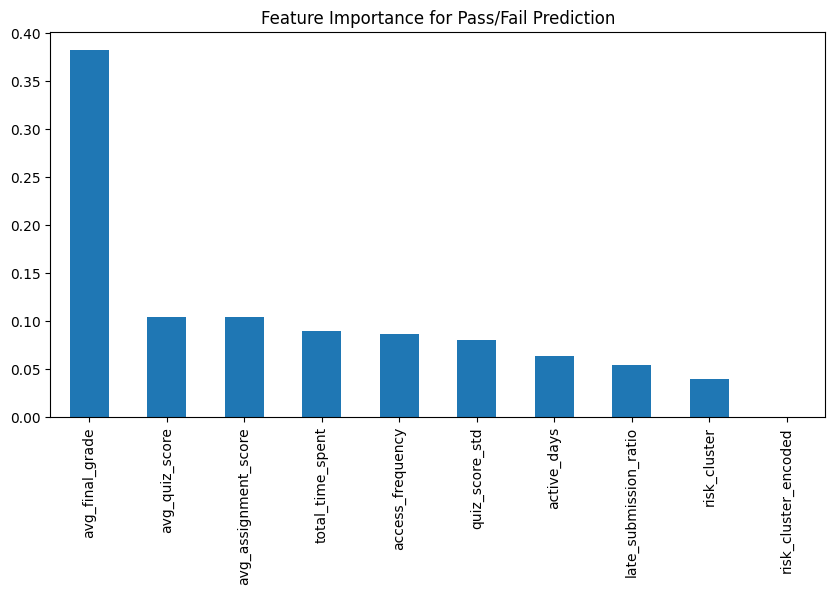

In [274]:
feature_importance.plot(
    kind='bar',
    figsize=(10,5),
    title='Feature Importance for Pass/Fail Prediction'
)
plt.show()


In [275]:
y_probs = rf.predict_proba(X_test)[:, 1]
y_pred_custom = (y_probs >= 0.4).astype(int)

print("Adjusted Threshold Accuracy:", accuracy_score(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))


Adjusted Threshold Accuracy: 0.6571428571428571
[[17  7]
 [ 5  6]]


In [276]:
import joblib

joblib.dump(rf, "pass_fail_model.pkl")


['pass_fail_model.pkl']